<a href="https://colab.research.google.com/github/kanaka-22/Pneumonia-Prediction/blob/main/Normal_Covid_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID VS PNEUMONIA

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import os
import cv2

In [ ]:
Covid = '/content/drive/MyDrive/NorCov/COVID-19'
Pneumonia = '/content/drive/MyDrive/NorCov/Viral Pneumonia'

In [ ]:
from glob import glob
Covid_files = glob(Covid + '/*')
Pneumonia_files = glob(Pneumonia + '/*')

In [ ]:
print("First 5 Covid Files: ",Covid_files[0:5])
print("Total Count: ",len(Covid_files))
print("First 5 Pneumonia Files: ",Pneumonia_files[0:5])
print("Total Count: ",len(Pneumonia_files))

First 5 Covid Files:  ['/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (1).png', '/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (10).png', '/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (101).png', '/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (100).png', '/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (104).png']
Total Count:  219
First 5 Pneumonia Files:  ['/content/drive/MyDrive/NorCov/Viral Pneumonia/Viral Pneumonia (594).png', '/content/drive/MyDrive/NorCov/Viral Pneumonia/Viral Pneumonia (593).png', '/content/drive/MyDrive/NorCov/Viral Pneumonia/Viral Pneumonia (595).png', '/content/drive/MyDrive/NorCov/Viral Pneumonia/Viral Pneumonia (597).png', '/content/drive/MyDrive/NorCov/Viral Pneumonia/Viral Pneumonia (596).png']
Total Count:  1391


In [ ]:
Covid_labels = []
Pneumonia_labels = []

In [ ]:
Covid_images = []
Pneumonia_images = []

In [ ]:
for i in range(len(Covid_files)):
  import cv2 
  image = cv2.imread(Covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Covid_images.append(image)
  Covid_labels.append('Chest_COVID')

In [ ]:
for i in range(len(Pneumonia_files)):
  import cv2 
  image = cv2.imread(Pneumonia_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Pneumonia_images.append(image)
  Pneumonia_labels.append('Chest_PNEUMONIA')

In [ ]:
Covid_images = np.array(Covid_images) / 255
Pneumonia_images = np.array(Pneumonia_images) / 255

In [ ]:
Covid_labels = np.array([1 for _ in range(len(Covid_images))])
Pneumonia_labels = np.array([0 for _ in range(len(Pneumonia_images))])

In [ ]:
from sklearn.model_selection import train_test_split
Covid_x_train, Covid_x_test, Covid_y_train, Covid_y_test = train_test_split(Covid_images, Covid_labels, test_size=0.2)
Pneumonia_x_train, Pneumonia_x_test, Pneumonia_y_train, Pneumonia_y_test = train_test_split(Pneumonia_images, Pneumonia_labels, test_size=0.2)
X_train = np.concatenate((Pneumonia_x_train[:80], Covid_x_train[:80]), axis=0)
X_test = np.concatenate((Pneumonia_x_test[80:], Covid_x_test[80:]), axis=0)
y_train = np.concatenate((Pneumonia_y_train[:80], Covid_y_train[:80]), axis=0)
y_test = np.concatenate((Pneumonia_y_test[80:], Covid_y_test[80:]), axis=0)

In [ ]:
print("Number of samples in train and test are %d and %d.",(X_train.shape[0],X_test.shape[0]))

Number of samples in train and test are %d and %d. (160, 199)


In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_aug = ImageDataGenerator(rescale=1. /255)

In [ ]:
model = tf.keras.models.Sequential([
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=0.001),metrics=["accuracy"])

In [ ]:
epochs = 50
batch_size = 32

In [ ]:
history = model.fit_generator(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) // batch_size,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
5/5 [==============================] - 28s 6s/step - loss: 3.5240 - accuracy: 0.4563 - val_loss: 0.6156 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 27s 5s/step - loss: 0.6970 - accuracy: 0.4563 - val_loss: 0.6621 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 27s 5s/step - loss: 0.6799 - accuracy: 0.5562 - val_loss: 0.3174 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 27s 5s/step - loss: 1.0939 - accuracy: 0.6000 - val_loss: 0.7405 - val_accuracy: 0.2563
Epoch 5/50
5/5 [==============================] - 27s 5s/step - loss: 0.6092 - accuracy: 0.7250 - val_loss: 0.9516 - val_accuracy: 0.1859
Epoch 6/50
5/5 [==============================] - 27s 5s/step - loss: 0.5415 - accuracy: 0.7750 - val_loss: 0.3389 - val_accuracy: 0.9397
Epoch 7/50
5/5 [==============================] - 27s 5s/step - loss: 0.8116 - accuracy: 0.8000 

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.18766425549983978
Test accuracy: 0.9346733689308167


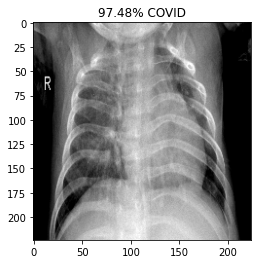

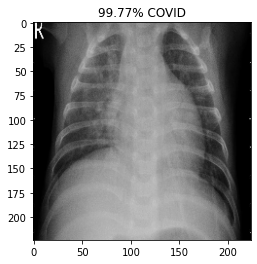

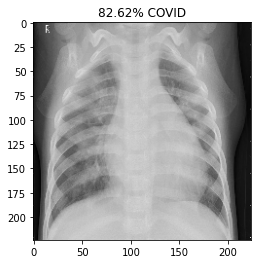

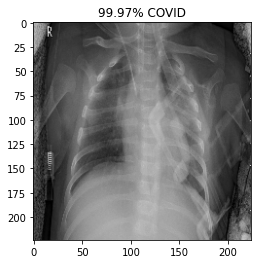

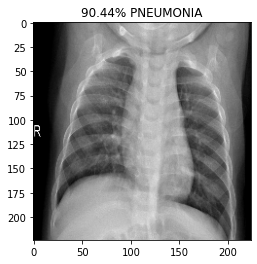

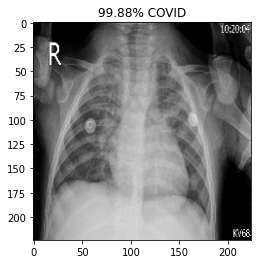

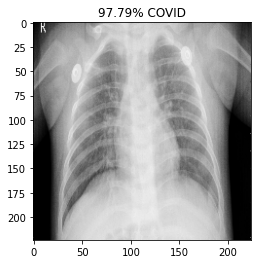

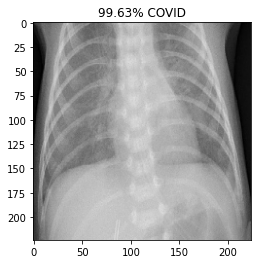

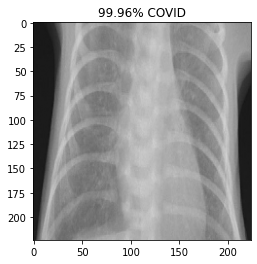

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)
prediction=y_pred[1:10]
for index, probability in enumerate(prediction):
  if probability[0] > 0.5:
    plt.title('%.2f' % (probability[0]*100) + '% PNEUMONIA')
  else:
    plt.title('%.2f' % ((1-probability[0])*100) + '% COVID')
  plt.imshow(X_test[index])
  plt.show()

PNEUMONIA VS NORMAL

In [ ]:
pneumonia = '/content/drive/My Drive/NorCov/Viral Pneumonia'
normal = '/content/drive/My Drive/NorCov/NORMAL'

In [ ]:
from glob import glob
pneumonia_files = glob(pneumonia + '/*')
normal_files = glob(normal + '/*')

In [ ]:
print("First 5 Pneumonia Files: ",pneumonia_files[0:5])
print("Total Count: ",len(pneumonia_files))
print("First 5 Normal Files: ",normal_files[0:5])
print("Total Count: ",len(normal_files))

First 5 Pneumonia Files:  ['/content/drive/My Drive/NorCov/Viral Pneumonia/Viral Pneumonia (594).png', '/content/drive/My Drive/NorCov/Viral Pneumonia/Viral Pneumonia (593).png', '/content/drive/My Drive/NorCov/Viral Pneumonia/Viral Pneumonia (595).png', '/content/drive/My Drive/NorCov/Viral Pneumonia/Viral Pneumonia (597).png', '/content/drive/My Drive/NorCov/Viral Pneumonia/Viral Pneumonia (596).png']
Total Count:  1391
First 5 Normal Files:  ['/content/drive/My Drive/NorCov/NORMAL/NORMAL (586).png', '/content/drive/My Drive/NorCov/NORMAL/NORMAL (585).png', '/content/drive/My Drive/NorCov/NORMAL/NORMAL (588).png', '/content/drive/My Drive/NorCov/NORMAL/NORMAL (587).png', '/content/drive/My Drive/NorCov/NORMAL/NORMAL (589).png']
Total Count:  1343


In [ ]:
pneumonia_labels = []
normal_labels = []

In [ ]:
pneumonia_images = []
normal_images = []

In [ ]:
for i in range(len(pneumonia_files)):
  import cv2 
  image = cv2.imread(pneumonia_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  pneumonia_images.append(image)
  pneumonia_labels.append('PNEUMONIA')

In [ ]:
for i in range(len(normal_files)):
  import cv2 
  image = cv2.imread(normal_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  normal_images.append(image)
  normal_labels.append('NORMAL')

In [ ]:
pneumonia_images = np.array(pneumonia_images) / 255
normal_images = np.array(normal_images) / 255

In [ ]:
pneumonia_labels = np.array([1 for _ in range(len(pneumonia_images))])
normal_labels = np.array([0 for _ in range(len(normal_images))])

In [ ]:
from sklearn.model_selection import train_test_split
pneumonia_x_train, pneumonia_x_test, pneumonia_y_train, pneumonia_y_test = train_test_split(pneumonia_images, pneumonia_labels, test_size=0.2)
normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(normal_images, normal_labels, test_size=0.2)
X_train = np.concatenate((normal_x_train[:80], pneumonia_x_train[:80]), axis=0)
X_test = np.concatenate((normal_x_test[80:], pneumonia_x_test[80:]), axis=0)
y_train = np.concatenate((normal_y_train[:80], pneumonia_y_train[:80]), axis=0)
y_test = np.concatenate((normal_y_test[80:], pneumonia_y_test[80:]), axis=0)

In [ ]:
print("Number of samples in train and test are %d and %d.",(X_train.shape[0],X_test.shape[0]))

Number of samples in train and test are %d and %d. (160, 388)


In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_aug = ImageDataGenerator(rescale=1. /255)

In [ ]:
model = tf.keras.models.Sequential([
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
  
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=0.001),metrics=["accuracy"])

In [ ]:
epochs = 50
batch_size = 32

In [ ]:
history = model.fit_generator(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) // batch_size,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
5/5 [==============================] - 36s 7s/step - loss: 3.3573 - accuracy: 0.4625 - val_loss: 0.6988 - val_accuracy: 0.4871
Epoch 2/50
5/5 [==============================] - 35s 7s/step - loss: 0.6986 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.4871
Epoch 3/50
5/5 [==============================] - 35s 7s/step - loss: 0.7077 - accuracy: 0.4875 - val_loss: 0.6941 - val_accuracy: 0.4871
Epoch 4/50
5/5 [==============================] - 35s 7s/step - loss: 0.6912 - accuracy: 0.5437 - val_loss: 0.6922 - val_accuracy: 0.4716
Epoch 5/50
5/5 [==============================] - 35s 7s/step - loss: 0.7047 - accuracy: 0.5813 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 6/50
5/5 [==============================] - 35s 7s/step - loss: 0.6405 - accuracy: 0.6562 - val_loss: 0.7817 - val_accuracy: 0.5180
Epoch 7/50
5/5 [==============================] - 35s 7s/step - loss: 0.5970 - accuracy: 0.6938 

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.4288022816181183
Test accuracy: 0.8247422575950623


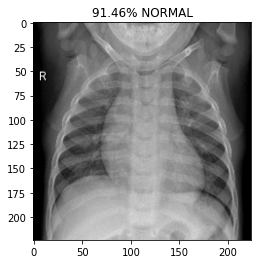

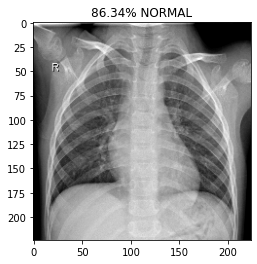

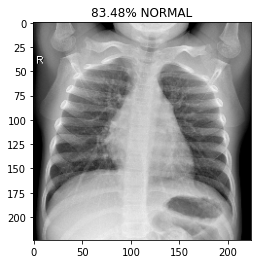

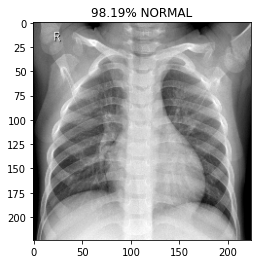

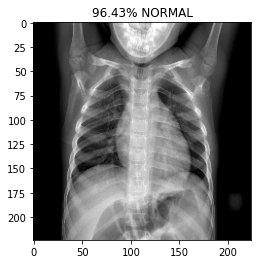

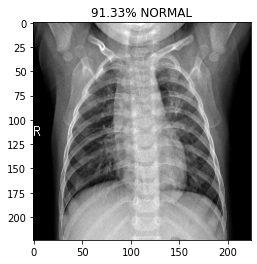

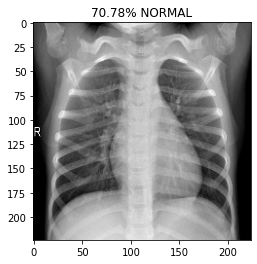

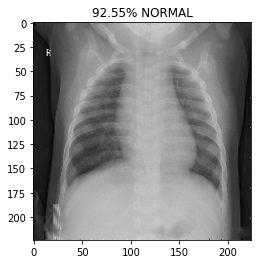

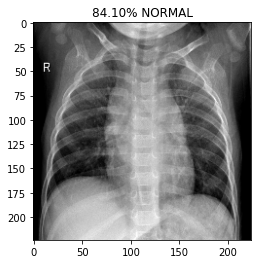

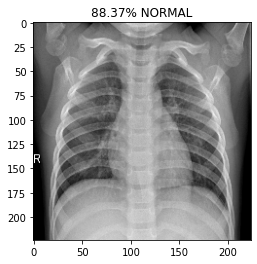

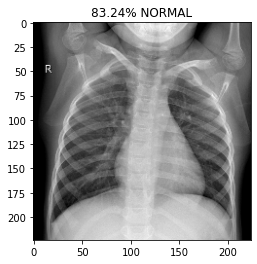

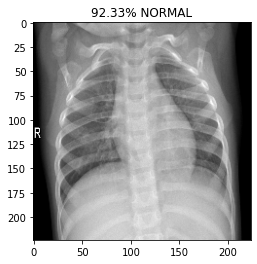

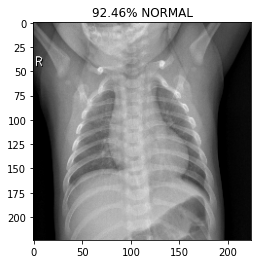

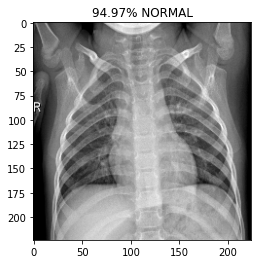

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)
prediction=y_pred[1:15]
for index, probability in enumerate(prediction):
  if probability[0] > 0.5:
    plt.title('%.2f' % (probability[0]*100) + '% PNEUMONIA')
  else:
    plt.title('%.2f' % ((1-probability[0])*100) + '% NORMAL')
  plt.imshow(X_test[index])
  plt.show()

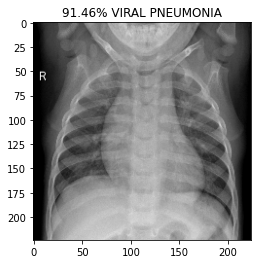

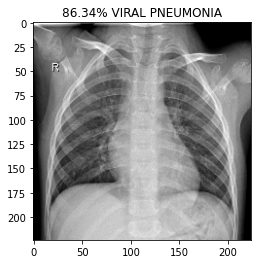

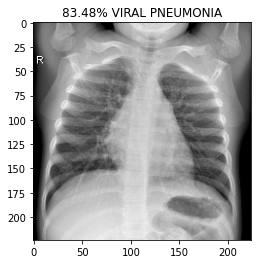

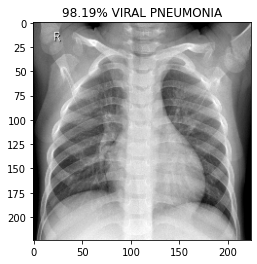

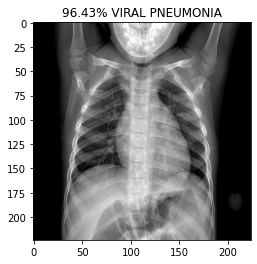

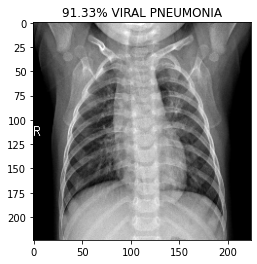

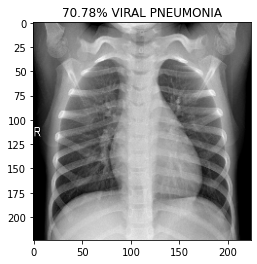

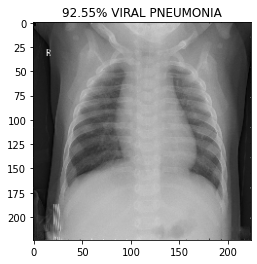

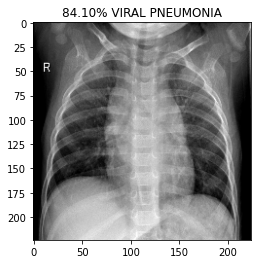

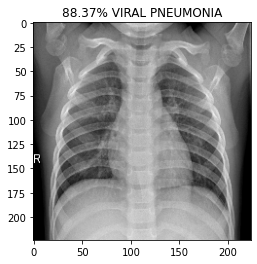

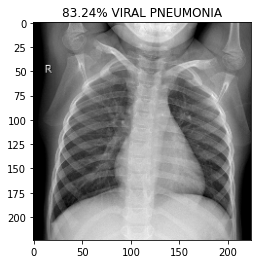

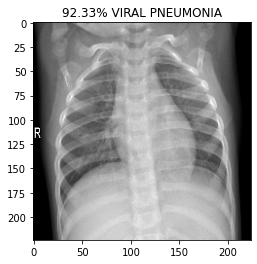

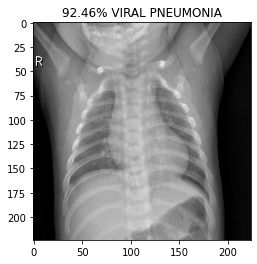

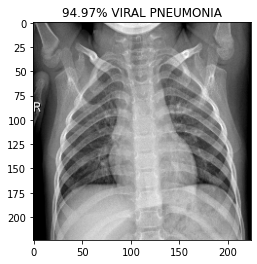

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)
prediction=y_pred[1:15]
for index, probability in enumerate(prediction):
  if probability[0] > 0.5:
    plt.title('%.2f' % (probability[0]*100) + '%  BACTERIAL PNEUMONIA')
  else:
    plt.title('%.2f' % ((1-probability[0])*100) + '% VIRAL PNEUMONIA')
  plt.imshow(X_test[index])
  plt.show()

COVID VS NORMAL

In [ ]:
covid = '/content/drive/MyDrive/NorCov/COVID-19'
normal = '/content/drive/MyDrive/NorCov/NORMAL'

In [ ]:
from glob import glob
covid_files = glob(covid + '/*')
normal_files = glob(normal + '/*')

In [ ]:
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))
print("First 5 Normal Files: ",normal_files[0:5])
print("Total Count: ",len(normal_files))

First 5 Covid Files:  ['/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (1).png', '/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (10).png', '/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (101).png', '/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (100).png', '/content/drive/MyDrive/NorCov/COVID-19/COVID-19 (104).png']
Total Count:  219
First 5 Normal Files:  ['/content/drive/MyDrive/NorCov/NORMAL/NORMAL (586).png', '/content/drive/MyDrive/NorCov/NORMAL/NORMAL (585).png', '/content/drive/MyDrive/NorCov/NORMAL/NORMAL (588).png', '/content/drive/MyDrive/NorCov/NORMAL/NORMAL (587).png', '/content/drive/MyDrive/NorCov/NORMAL/NORMAL (589).png']
Total Count:  1343


In [ ]:
covid_labels = []
normal_labels = []

In [ ]:
covid_images = []
normal_images = []

In [ ]:
for i in range(len(covid_files)):
  import cv2 
  image = cv2.imread(covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  covid_images.append(image)
  covid_labels.append('COVID')

In [ ]:
for i in range(len(normal_files)):
  import cv2 
  image = cv2.imread(normal_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  normal_images.append(image)
  normal_labels.append('NORMAL')

In [ ]:
covid_images = np.array(covid_images) / 255
normal_images = np.array(normal_images) / 255
covid_labels = np.array([1 for _ in range(len(covid_images))])
normal_labels = np.array([0 for _ in range(len(normal_images))])

In [ ]:
from sklearn.model_selection import train_test_split
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(covid_images, covid_labels, test_size=0.2)
normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(normal_images, normal_labels, test_size=0.2)
X_train = np.concatenate((normal_x_train[:80], covid_x_train[:80]), axis=0)
X_test = np.concatenate((normal_x_test[80:], covid_x_test[80:]), axis=0)
y_train = np.concatenate((normal_y_train[:80], covid_y_train[:80]), axis=0)
y_test = np.concatenate((normal_y_test[80:], covid_y_test[80:]), axis=0)

In [ ]:
print("Number of samples in train and test are %d and %d.",(X_train.shape[0],X_test.shape[0]))

Number of samples in train and test are %d and %d. (160, 189)


In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_aug = ImageDataGenerator(rescale=1. /255)

In [ ]:
model = tf.keras.models.Sequential([
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
  
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 256)      

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=0.001),metrics=["accuracy"])

In [ ]:
epochs = 50
batch_size = 32

In [ ]:
history = model.fit_generator(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) // batch_size,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs)

Epoch 1/50
5/5 [==============================] - 27s 5s/step - loss: 3.0381 - accuracy: 0.5000 - val_loss: 0.8105 - val_accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 27s 5s/step - loss: 0.7025 - accuracy: 0.5000 - val_loss: 0.5961 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 27s 5s/step - loss: 0.6692 - accuracy: 0.5188 - val_loss: 0.4862 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 27s 5s/step - loss: 0.6468 - accuracy: 0.6375 - val_loss: 0.3926 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 27s 5s/step - loss: 0.6478 - accuracy: 0.6500 - val_loss: 0.6748 - val_accuracy: 0.5503
Epoch 6/50
5/5 [==============================] - 27s 5s/step - loss: 0.5150 - accuracy: 0.8000 - val_loss: 0.5467 - val_accuracy: 0.7037
Epoch 7/50
5/5 [==============================] - 27s 5s/step - loss: 0.6622 - accuracy: 0.7437 - val_loss: 0.6927 - val_accuracy: 0.5873
Epoch 8/50
5/5 [==============

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.06889581680297852
Test accuracy: 0.9576719403266907


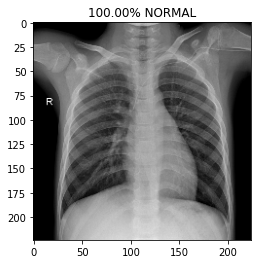

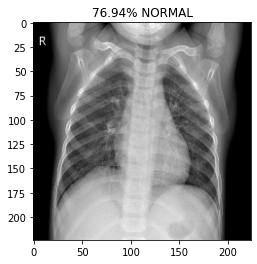

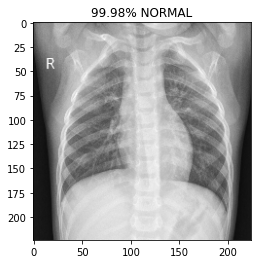

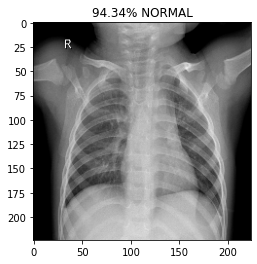

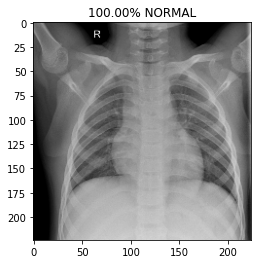

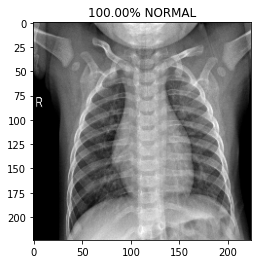

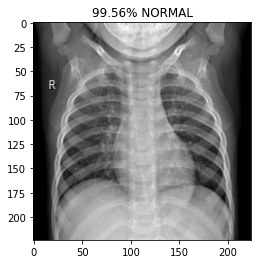

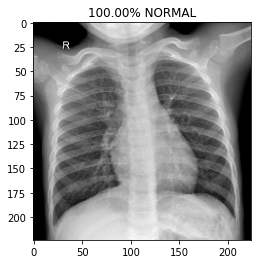

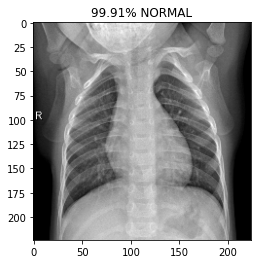

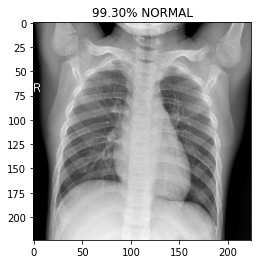

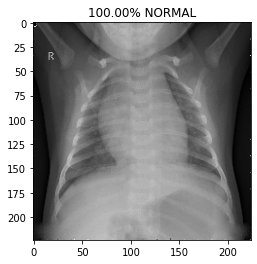

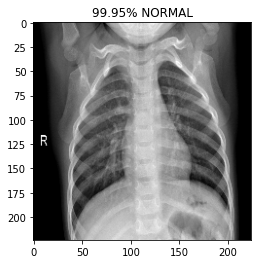

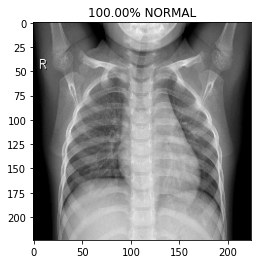

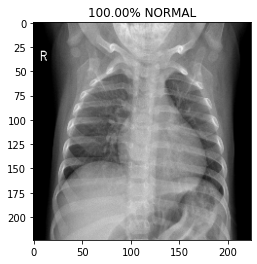

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)
prediction=y_pred[1:15]
for index, probability in enumerate(prediction):
  if probability[0] > 0.5:
    plt.title('%.2f' % (probability[0]*100) + '% COVID')
  else:
    plt.title('%.2f' % ((1-probability[0])*100) + '% NORMAL')
  plt.imshow(X_test[index])
  plt.show()